# Feature engineering
- 머신러닝 모델에 적용, 데이터 분석 등을 위해 데이터에 대한
도메인 지식을 활용하여 특성을 만들어내는 과정


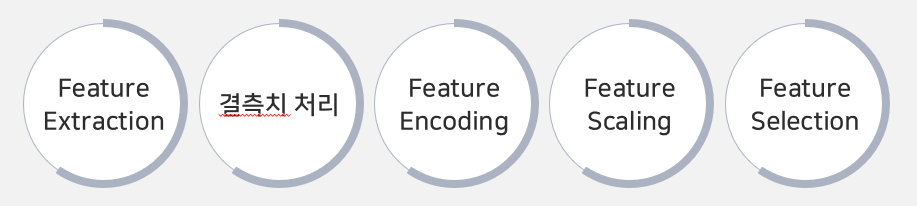

- 구글 드라이브 연결

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


- 신용 위험을 예측하는 이진분류 데이터셋
    - 정답데이터 : 신용위험도 컬럼
        - 1: 신용위험이 있다.
        - 0: 신용이 좋다.

In [2]:
# DATA_PATH = "/content/drive/MyDrive/data/"

In [1]:
import numpy as np
import pandas as pd
import os

DATA_PATH=os.getcwd()+'/data'

train_customer = pd.read_csv(f"{DATA_PATH}//credit_customer_train.csv") # 고객의 개인정보
train_payment = pd.read_csv(f"{DATA_PATH}//credit_payment_train.csv") # 고객별 카드값 변제 내역

test_customer = pd.read_csv(f"{DATA_PATH}//credit_customer_test.csv") # 고객의 개인정보
test_payment = pd.read_csv(f"{DATA_PATH}//credit_payment_test.csv") # 고객별 카드값 변제 내역

In [2]:
train_customer.shape, train_payment.shape, test_customer.shape, test_payment.shape

((787, 13), (5693, 12), (338, 12), (2557, 12))

- 고객의 개인정보

In [3]:
train_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    787 non-null    int64  
 1   범주1     787 non-null    int64  
 2   범주2     787 non-null    int64  
 3   범주3     787 non-null    int64  
 4   범주4     787 non-null    int64  
 5   범주5     787 non-null    int64  
 6   범주6     787 non-null    int64  
 7   수치1     787 non-null    float64
 8   수치2     787 non-null    float64
 9   수치3     787 non-null    int64  
 10  수치4     787 non-null    int64  
 11  수치5     787 non-null    float64
 12  신용위험도   787 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 80.1 KB


In [4]:
train_customer.head()

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,수치5,신용위험도
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,60064,1.000000,0
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,340014,187.082869,0
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,60018,158.113883,0
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,350008,1.000000,0
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,60091,158.407702,0


- 고객별 카드값의 변제 내역

In [5]:
train_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      5693 non-null   int64  
 1   연체횟수유형1   5693 non-null   int64  
 2   연체횟수유형2   5693 non-null   int64  
 3   연체횟수유형3   5693 non-null   int64  
 4   총연체일수     5693 non-null   int64  
 5   정상결제횟수    5693 non-null   int64  
 6   카드코드      5693 non-null   int64  
 7   카드한도      1486 non-null   float64
 8   계정업데이트날짜  5676 non-null   object 
 9   카드현재잔액    5693 non-null   float64
 10  카드최고잔액    5415 non-null   float64
 11  최근지불날짜    4959 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 533.8+ KB


In [6]:
train_payment.head()

,고객ID,연체횟수유형1,연체횟수유형2,연체횟수유형3,총연체일수,정상결제횟수,카드코드,카드한도,계정업데이트날짜,카드현재잔액,카드최고잔액,최근지불날짜
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
4,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN


In [7]:
train_payment.groupby("고객ID", group_keys=True).apply(lambda x : x)

고객ID  연체횟수유형1  연체횟수유형2  연체횟수유형3  총연체일수  정상결제횟수  카드코드  \
고객ID                                                                      
54982353 1848  54982353        0        0        0      0       1    10   
         2662  54982353        1        0        0      1      31    10   
         3724  54982353        0        0        0      0      19    10   
         4257  54982353        0        0       35  31500       0    10   
         4969  54982353        0        0        0      0      26    10   
...                 ...      ...      ...      ...    ...     ...   ...   
59006219 3072  59006219        1        0        0     28      35    10   
         3080  59006219        0        0        0      0      36    10   
59006239 1227  59006239        0        0        0      0      12    10   
         1357  59006239        0        0        0      0       1     6   
         2316  59006239        0        0        0      0      19    10   

                   카드한도    계정업데이트날짜    카드현재잔액    카드최고잔액      최근지불날짜  
고객ID                                                                 
54982353 1848   55000.0  27/08/2014       0.0    2068.0  12/06/2014  
         2662  550000.0  03/09/2013  326684.4  609683.0  18/12/2015  
         3724       NaN  16/07/2011   31677.6  204037.0  14/12/2015  
         4257   12100.0  27/12/2008   12142.8   10619.0  14/07/2009  
         4969  660000.0  12/03/2007  252998.4  775030.0  23/12/2015  
...                 ...         ...       ...       ...         ...  
59006219 3072   33000.0  28/01/2013    9956.4   22591.0  04/02/2016  
         3080       NaN  27/01/2013    1344.0   44655.0  13/03/2016  
59006239 1227       NaN  23/03/2015    2492.4   15440.0  19/02/2016  
         1357       NaN  14/02/2015       0.0   21000.0  22/10/2015  
         2316   15400.0  07/02/2014       0.0   13901.0  14/11/2015  

[5693 rows x 12 columns]

# 특성 추출(Feature Extraction)
- 주어진 데이터에서 머신러닝 모델이 학습 및 예측에서 사용할 특성변수(Features)를 추출하는 과정
- 원본 특성들을 조합하거나 집계 등을 하여 새로운 특성을 생성
- 중요한 Feature끼리 사칙연산 등을 수행해서 새로운 특성을 생성
- 하나의 샘플이 여러 개의 행으로 구성된 데이터일 경우 평균, 표준편차 등으로 집계하여 특성을 생성

## 하나의 샘플이 여러 개의 행으로 구성된 데이터 집계하여 피쳐생성
- 하나의 샘플이 여러 개의 행으로 구성된 데이터일 경우 평균, 표준편차 등으로 집계하여 머신러닝 모델에서 학습 가능한 형태로 특성을 생성

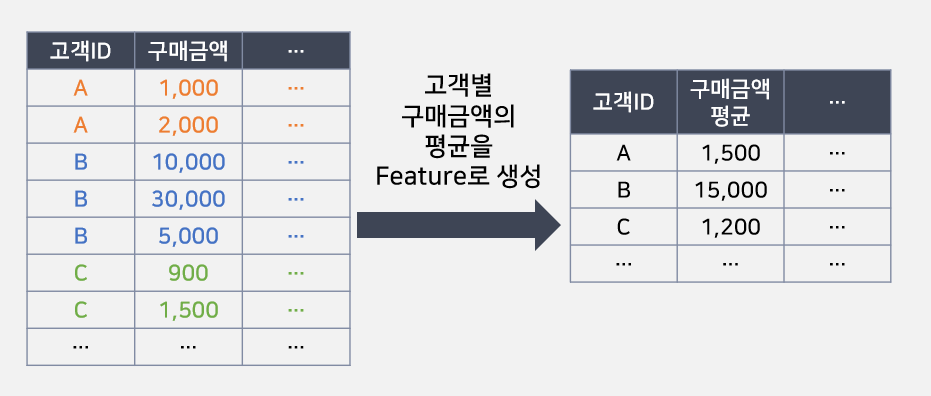

In [8]:
agg_dict = {
    # "집계대상컬럼" : [
    #     ("집계후 컬럼명지정", "집계함수")
    # ]
    "연체횟수유형1": [
        ("연체횟수유형1_sum", "sum"),
        ("변제횟수", "count")
    ],
    "연체횟수유형2": [
        ("연체횟수유형2_sum", "sum"),
    ],
    "연체횟수유형3": [
        ("연체횟수유형3_sum", "sum"),
    ],
    "총연체일수": [
        ("총연체일수_sum", "sum"),
    ],
    "정상결제횟수": [
        ("정상결제횟수_sum", "sum"),
        ("정상결제횟수_mean", "mean"),
        ("정상결제횟수_std", "std"),
    ],
    "카드코드": [
        ("카드코드_nunique", "nunique")
    ],
    "카드한도": [
        ("카드한도_mean", "mean"),
        ("카드한도_std", "std"),
    ],
    "카드현재잔액": [
        ("카드현재잔액_mean", "mean"),
        ("카드현재잔액_std", "std"),
    ],
    "카드최고잔액": [
        ("카드최고잔액_mean", "mean"),
        ("카드최고잔액_std", "std"),
    ],
}

tmp = train_payment.groupby("고객ID").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()
tmp

,고객ID,연체횟수유형1_sum,변제횟수,연체횟수유형2_sum,연체횟수유형3_sum,총연체일수_sum,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,54982353,3,18,2,38,32078,229,12.722222,13.654586,3,259600.0,287253.790227,42033.133333,95414.365020,246583.714286,294232.061830
1,54982356,0,7,0,0,0,117,16.714286,14.817943,4,330000.0,NaN,2277.771429,6023.771407,196649.285714,276735.785384
2,54982387,3,11,0,0,12,246,22.363636,10.846868,3,109450.0,148890.597420,117455.127273,285177.439067,238270.000000,367205.535992
3,54982463,0,2,0,0,0,34,17.000000,2.828427,2,NaN,NaN,39890.400000,56413.544688,78500.000000,31112.698372
4,54982530,0,4,0,0,0,56,14.000000,7.702813,1,94600.0,56002.857070,1261.200000,2097.743473,12787.750000,8833.717201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,59005917,0,2,0,0,0,17,8.500000,6.363961,1,105600.0,NaN,7432.200000,6548.091636,18773.500000,5701.401977
783,59005995,0,3,0,0,0,49,16.333333,11.590226,2,35200.0,10889.444430,57099.600000,51136.985727,105173.666667,126020.724606
784,59006193,0,8,0,0,0,106,13.250000,11.360961,2,105160.0,31725.037431,13651.350000,30201.805753,50328.625000,24775.431551
785,59006219,1,3,0,0,28,81,27.000000,14.730920,2,33000.0,NaN,179909.200000,301856.158793,189248.666667,269777.221797


In [9]:
train_ft = train_customer.merge(tmp, how="left", on = "고객ID")
train_ft

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58996294,7,1,2,11,5,3,1239.5,110000.0,80,...,26,6.500000,6.454972,2,107800.000000,NaN,341837.40,382976.993952,253341.750000,250922.387985
1,54988879,4,3,2,8,-1,5,1223.0,68000.0,112,...,38,12.666667,6.027714,2,74250.000000,11667.261890,19739.60,22504.881401,36681.666667,14667.393509
2,58984937,5,1,2,15,-1,4,1296.5,130000.0,86,...,79,15.800000,13.386560,2,16500.000000,NaN,29227.68,62191.709155,50258.600000,90255.710081
3,58987530,5,1,2,15,5,3,1304.0,146000.0,90,...,149,14.900000,15.444884,2,44805.514286,46327.898604,2053.68,4547.761408,37493.888889,23725.174038
4,59003965,4,2,2,8,9,4,0.0,76000.0,113,...,44,14.666667,11.239810,1,89100.000000,32668.333291,161.20,288.610187,19747.333333,13688.020030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,58994117,7,1,2,11,5,3,1323.5,122000.0,86,...,75,15.000000,13.114877,3,11000.000000,NaN,55607.52,101873.752743,104254.600000,110592.850324
783,58995289,7,2,2,11,5,4,0.0,50000.0,113,...,182,16.545455,13.582074,5,54450.000000,11378.488476,37244.40,47531.921644,55939.272727,35578.302720
784,58996500,7,1,2,11,9,5,1328.0,189000.0,85,...,36,18.000000,1.414214,1,99000.000000,85559.920524,18006.60,25465.177932,55935.500000,76809.474106
785,59001833,4,3,2,8,9,4,1250.0,95000.0,111,...,42,14.000000,7.549834,2,57200.000000,NaN,10548.80,18271.057559,33011.666667,18617.945814


- 테스트 데이터도 동일한 방식으로 피처 추가

- data leakage 란?
    - 머신러닝에서 Data Leakage는 예측시 사용할 수 없는 정보가 모델의 학습 및 평가에 사용되는 것을 말한다.


In [10]:
tmp = test_payment.groupby("고객ID").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()
test_ft = test_customer.merge(tmp, how="left", on="고객ID")
test_ft

,고객ID,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,...,정상결제횟수_sum,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std
0,58991594,7,3,1,11,5,5,1365.5,152000.0,84,...,117,16.714286,13.816829,4,120450.000000,145451.864890,237269.485714,388585.126964,250155.428571,391407.849007
1,54983822,5,3,2,15,5,4,0.0,94000.0,113,...,110,22.000000,7.000000,2,57200.000000,NaN,2450.640000,5487.179630,36809.600000,12823.881737
2,54984131,5,3,2,15,5,5,1244.0,57000.0,95,...,115,19.166667,8.704405,2,66366.666667,16838.745005,39169.000000,30712.634008,48969.666667,11405.139625
3,58994981,7,2,2,11,5,3,0.0,72000.0,109,...,30,15.000000,5.656854,1,NaN,NaN,19324.800000,27329.394250,48771.000000,54119.124605
4,59004856,4,2,2,8,5,3,0.0,99000.0,90,...,33,16.500000,13.435029,1,82500.000000,NaN,19231.800000,27369.275073,23714.500000,27969.608730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,58992009,7,3,2,11,9,3,1290.5,273000.0,113,...,71,17.750000,4.349329,4,NaN,NaN,336236.100000,498550.920926,453426.250000,394427.443800
334,58993131,7,2,2,11,5,5,0.0,120000.0,101,...,91,8.272727,10.179302,4,NaN,NaN,3895.636364,12920.364138,47434.363636,26212.971881
335,58993847,7,3,2,11,9,4,1262.0,172000.0,112,...,45,9.000000,8.276473,2,NaN,NaN,115285.440000,256848.631635,142382.800000,209631.629167
336,58995703,7,3,2,11,9,5,0.0,75000.0,100,...,230,19.166667,10.878113,4,82500.000000,0.000000,353.600000,714.121334,126724.500000,200504.087986


## 특성들을 파악하여 조합을 통해 새로운 특성을 생성
- 원본 특성들을 파악하여 조합을 통해 새로운 특성을 생성


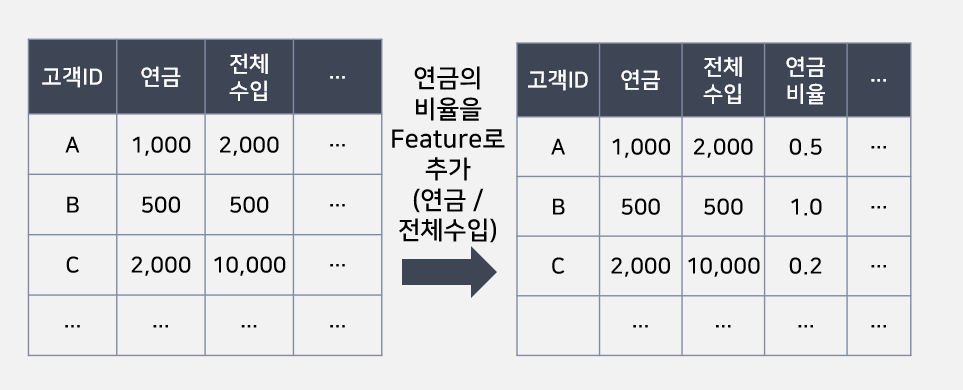

In [11]:
train_ft["총연체횟수"] = train_ft["연체횟수유형1_sum"] + train_ft["연체횟수유형2_sum"] + train_ft["연체횟수유형3_sum"]
test_ft["총연체횟수"] = test_ft["연체횟수유형1_sum"] + test_ft["연체횟수유형2_sum"] + test_ft["연체횟수유형3_sum"]

- 정답데이터

In [12]:
target = train_ft["신용위험도"]
target.mean()

0.19949174078780177

In [13]:
train_ft = train_ft.drop(columns= ["신용위험도", "고객ID"])
test_ft = test_ft.drop(columns= ["고객ID"])
train_ft.shape, test_ft.shape

((787, 27), (338, 27))

# 결측치 처리(Handling Missing Values)
- 정형 데이터를 다루다 보면 각 특성별로 비어 있는 값들이
존재하는 경우가 빈번함
- 머신러닝 모델에 특성을 입력할 때는 결측치를 채워서 입력해야 함
- 수치형 데이터 결측치 처리
    - 평균, 중앙값 등
    - 특성 변수의 수치의 의미를 파악하여 새로운 값으로 처리
        - ex) 0으로 처리
- 범주형 데이터 결측치 처리
    - 최빈값
    - 새로운 범주를 생성하여 처리
        - ex) “UNK” 문자열로 처리





- 결측치 확인

In [14]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

정상결제횟수_std     35
카드한도_mean     134
카드한도_std      421
카드현재잔액_std     35
카드최고잔액_std     36
dtype: int64

In [15]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

정상결제횟수_std     12
카드한도_mean      46
카드한도_std      169
카드현재잔액_std     12
카드최고잔액_std     13
dtype: int64

- 결측치 컬럼

In [16]:
cols = ["정상결제횟수_std", "카드한도_mean", "카드한도_std", "카드현재잔액_std", "카드최고잔액_std"]

## pandas를 이용한 방법

In [17]:
mean_ = train_ft["카드한도_mean"].mean()
train_ft["카드한도_mean"].fillna(mean_)

0      107800.000000
1       74250.000000
2       16500.000000
3       44805.514286
4       89100.000000
           ...      
782     11000.000000
783     54450.000000
784     99000.000000
785     57200.000000
786    105600.000000
Name: 카드한도_mean, Length: 787, dtype: float64

In [18]:
train_ft.fillna(0)

,범주1,범주2,범주3,범주4,범주5,범주6,수치1,수치2,수치3,수치4,...,정상결제횟수_mean,정상결제횟수_std,카드코드_nunique,카드한도_mean,카드한도_std,카드현재잔액_mean,카드현재잔액_std,카드최고잔액_mean,카드최고잔액_std,총연체횟수
0,7,1,2,11,5,3,1239.5,110000.0,80,60064,...,6.500000,6.454972,2,107800.000000,0.000000,341837.40,382976.993952,253341.750000,250922.387985,0
1,4,3,2,8,-1,5,1223.0,68000.0,112,340014,...,12.666667,6.027714,2,74250.000000,11667.261890,19739.60,22504.881401,36681.666667,14667.393509,0
2,5,1,2,15,-1,4,1296.5,130000.0,86,60018,...,15.800000,13.386560,2,16500.000000,0.000000,29227.68,62191.709155,50258.600000,90255.710081,0
3,5,1,2,15,5,3,1304.0,146000.0,90,350008,...,14.900000,15.444884,2,44805.514286,46327.898604,2053.68,4547.761408,37493.888889,23725.174038,6
4,4,2,2,8,9,4,0.0,76000.0,113,60091,...,14.666667,11.239810,1,89100.000000,32668.333291,161.20,288.610187,19747.333333,13688.020030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,7,1,2,11,5,3,1323.5,122000.0,86,151300,...,15.000000,13.114877,3,11000.000000,0.000000,55607.52,101873.752743,104254.600000,110592.850324,5
783,7,2,2,11,5,4,0.0,50000.0,113,450080,...,16.545455,13.582074,5,54450.000000,11378.488476,37244.40,47531.921644,55939.272727,35578.302720,1
784,7,1,2,11,9,5,1328.0,189000.0,85,60019,...,18.000000,1.414214,1,99000.000000,85559.920524,18006.60,25465.177932,55935.500000,76809.474106,0
785,4,3,2,8,9,4,1250.0,95000.0,111,60047,...,14.000000,7.549834,2,57200.000000,0.000000,10548.80,18271.057559,33011.666667,18617.945814,0


## sklearn의 impute 모듈을 이용한 방법
- SimpleImputer 클래스 주요 파라미터
    - strategy
        - "mean" : 평균
        - "median" : 중앙값
        - "most_frequent" : 최빈값
        - "constant" : fill_value 파라미터에 지정된 값
    - fill_value
        - 지정한 값으로 채우고 싶을 경우


In [19]:
cols

['정상결제횟수_std', '카드한도_mean', '카드한도_std', '카드현재잔액_std', '카드최고잔액_std']

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit_transform(train_ft[cols])

array([[6.45497224e+00, 1.07800000e+05, 4.75399697e+04, 3.82976994e+05,
        2.50922388e+05],
       [6.02771377e+00, 7.42500000e+04, 1.16672619e+04, 2.25048814e+04,
        1.46673935e+04],
       [1.33865604e+01, 1.65000000e+04, 4.75399697e+04, 6.21917092e+04,
        9.02557101e+04],
       ...,
       [1.41421356e+00, 9.90000000e+04, 8.55599205e+04, 2.54651779e+04,
        7.68094741e+04],
       [7.54983444e+00, 5.72000000e+04, 4.75399697e+04, 1.82710576e+04,
        1.86179458e+04],
       [6.36396103e+00, 1.05600000e+05, 4.75399697e+04, 6.54809164e+03,
        5.70140198e+03]])

## 머신러닝 모델을 이용하여 결측치 채우기
- 결측치가 아닌 다른 변수들을 이용하여 결측치를 추정
- 주변에 결측치가 아닌 값들을 이용해서 결측치를 예측하여 채우는 방식


In [22]:
from sklearn.experimental import enable_iterative_imputer # 사용하기 위해 import 해야함.
from sklearn.impute import IterativeImputer

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

imputer = IterativeImputer(model, random_state=42)
train_ft.iloc[:,6:] = imputer.fit_transform(train_ft.iloc[:,6:])

In [24]:
test_ft.iloc[:,6:] = imputer.transform(test_ft.iloc[:,6:])

In [25]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

- 인코딩 실습을 위해 다음과 같이 가상의 데이터를 만들었어요!

In [26]:
map_dict = {
    1: "사원",
    2: "대리",
    3: "과장",
    4: "차장",
    5: "부장"
}
# 다음과 같이 가상의 데이터를 만들어 실습!!
df = pd.DataFrame(train_ft["범주6"].map(map_dict).to_numpy(), columns=["직급"])
df

,직급
0,과장
1,부장
2,차장
3,과장
4,차장
...,...
782,과장
783,차장
784,부장
785,차장


# 특성 인코딩(Feature Encoding)
- 머신러닝 모델은 수치형 데이터를 입력 받아야 한다
- 범주형 변수를 수치형 데이터로 변환해주는 방법을 인코딩이라고 한다


## Ordinal encoding
- 범주형 변수가 순서형인 경우에 적합한 방식으로 순서에 맞게 정수를 연속적으로 부여해서 인코딩 하는 방식​

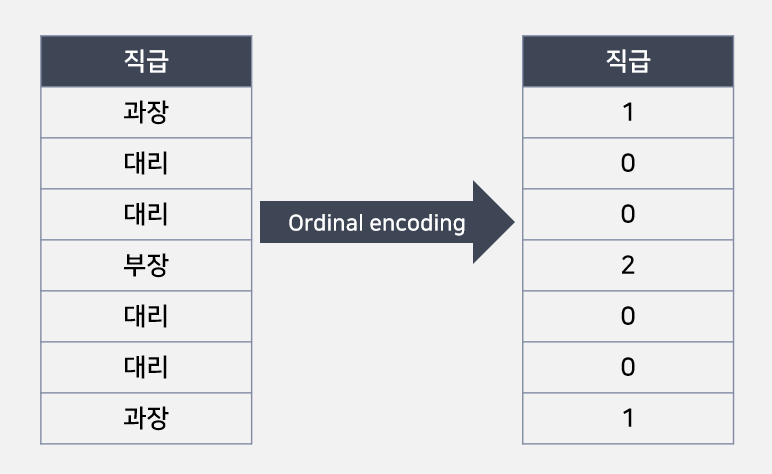

In [27]:
df["직급"].unique()

array(['과장', '부장', '차장', '사원', '대리'], dtype=object)

In [28]:
ordinal_dict = {
    '사원':0,
    '대리':1,
    '과장':2,
    '차장':3,
    '부장':4
}
df["직급"].map(ordinal_dict)

0      2
1      4
2      3
3      2
4      3
      ..
782    2
783    3
784    4
785    3
786    4
Name: 직급, Length: 787, dtype: int64

## Count encoding
- 범주형 변수의 각 고유값의 빈도수를 부여해서 인코딩 하는 방식
- 범주형 변수가 명목형인 경우 고유값의 개수가 많을 때 사용

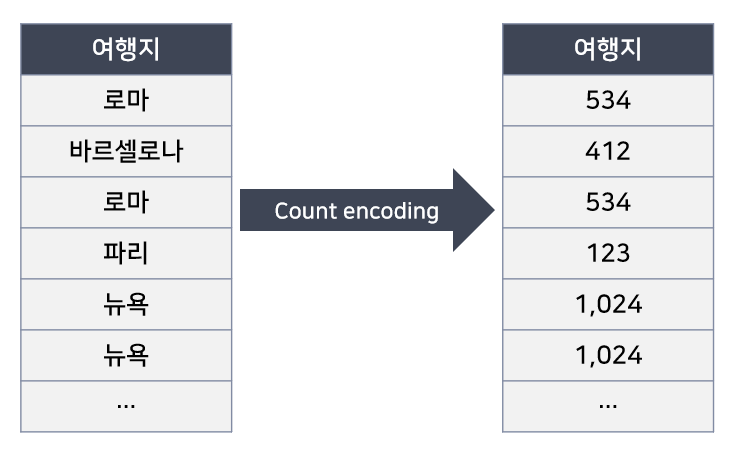

In [29]:
count_dict = df["직급"].value_counts().to_dict()

df["직급"].map(count_dict)

0      192
1      367
2      223
3      192
4      223
      ... 
782    192
783    223
784    367
785    223
786    367
Name: 직급, Length: 787, dtype: int64

## Label encoding
- 범주형 변수의 n개 고유값들을 0에서 n-1값으로 숫자를 부여해서 인코딩 하는 방식



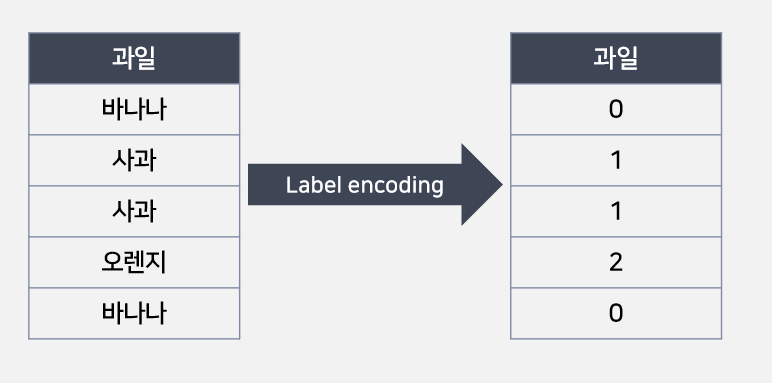

In [30]:
df["직급"]

0      과장
1      부장
2      차장
3      과장
4      차장
       ..
782    과장
783    차장
784    부장
785    차장
786    부장
Name: 직급, Length: 787, dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df["직급"])

array([0, 2, 4, 0, 4, 4, 4, 2, 0, 0, 2, 2, 2, 0, 0, 4, 4, 2, 4, 2, 4, 0,
       2, 2, 0, 2, 4, 2, 4, 2, 2, 2, 2, 0, 2, 2, 0, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 4, 0, 4, 4, 4, 0, 4, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 4, 0, 2, 2, 2, 0, 2, 0, 2, 2, 4, 4, 4, 2,
       0, 4, 0, 2, 4, 2, 4, 2, 0, 0, 0, 2, 0, 0, 4, 2, 0, 0, 2, 2, 0, 2,
       4, 0, 0, 4, 4, 2, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0, 0, 0, 4, 4, 2, 2,
       4, 4, 4, 4, 0, 2, 2, 0, 2, 4, 2, 2, 4, 2, 4, 0, 2, 2, 4, 4, 2, 4,
       4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 0, 0, 4, 2, 2, 0, 0,
       2, 2, 4, 0, 2, 0, 4, 2, 2, 0, 0, 4, 4, 4, 2, 4, 2, 0, 0, 2, 4, 0,
       2, 2, 2, 2, 0, 2, 4, 0, 2, 0, 0, 2, 2, 4, 2, 2, 4, 0, 2, 4, 0, 4,
       4, 4, 4, 0, 2, 4, 2, 2, 2, 0, 4, 2, 2, 2, 4, 4, 0, 4, 2, 2, 2, 0,
       4, 2, 2, 2, 4, 2, 0, 4, 2, 2, 2, 2, 2, 4, 0, 4, 2, 4, 0, 0, 0, 4,
       4, 2, 4, 4, 4, 4, 0, 0, 2, 0, 4, 4, 2, 2, 2,

## One-hot encoding
- 범주형 변수의 고유값의 개수만큼 열을 가진 데이터를 만들어 해당 범주의 인덱스에 1을 부여하고 아닌 인덱스 열에는 모두 0을 부여해서 인코딩하는 방식
- 고유값의 개수가 많으면 Feature의 차원이 많아짐
- 대부분의 값이 0인 희소(Sparse)한 데이터를 생성함



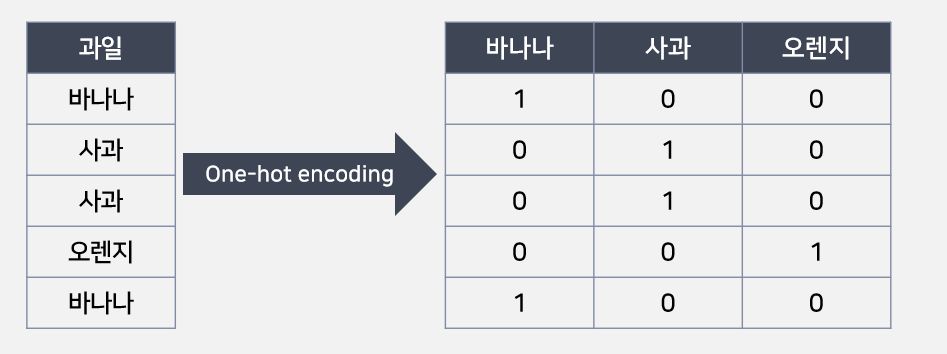

In [32]:
cols_cat = [col for col in train_ft.columns if col.startswith("범주")]
cols_cat

['범주1', '범주2', '범주3', '범주4', '범주5', '범주6']

In [33]:
train_ft[cols_cat].nunique()

범주1     6
범주2     3
범주3     2
범주4    10
범주5    10
범주6     5
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols_cat])

OneHotEncoder(handle_unknown='ignore')

In [35]:
train_ft[enc.get_feature_names_out()] = enc.transform(train_ft[cols_cat]).toarray()
test_ft[enc.get_feature_names_out()] = enc.transform(test_ft[cols_cat]).toarray()

In [36]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [37]:
cols_cat

['범주1', '범주2', '범주3', '범주4', '범주5', '범주6']

In [38]:
train_ft = train_ft.drop(columns=cols_cat)
test_ft = test_ft.drop(columns=cols_cat)

In [39]:
train_ft.shape, test_ft.shape

((787, 57), (338, 57))

# 특성 스케일링(Feature Scaling)
- 각 Feature들의 크기의 범위를 맞춰서 변환하는 방법


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

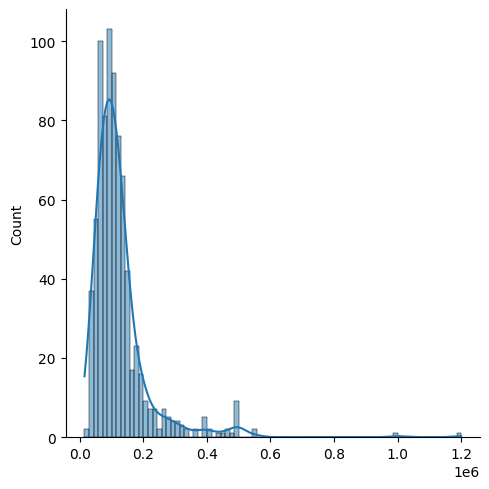

In [41]:
arr = train_ft["수치2"].to_numpy()
sns.displot(arr, kde=True)
plt.show()

## StandardScaler 클래스(Standardization)
- 각 Feature별로 평균과 표준편차를 이용하여 평균을 0, 분산이 1인 데이터로 Scaling
$$
\frac{x-\bar{x}}{σ}
$$

In [42]:
arr = arr.reshape(-1,1)
arr.shape

(787, 1)

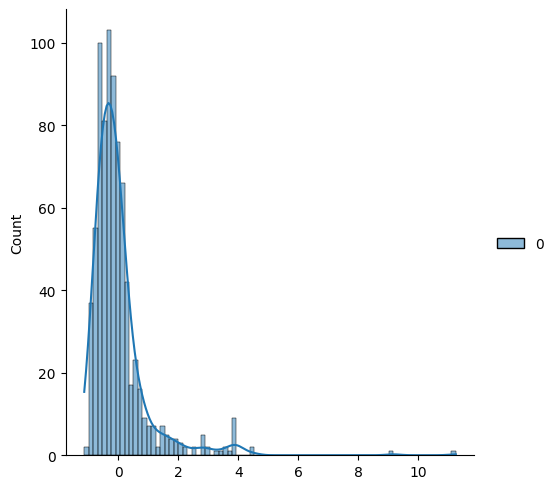

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp = scaler.fit_transform( arr )

sns.displot(tmp, kde=True)
plt.show()

In [44]:
tmp.mean(), tmp.var()

(-1.8056994555529866e-17, 1.0)

## MinMaxScaler 클래스
- 각 Feature별로 최소값과 최대값을 이용하여 최소값은 0, 최대값은 1인 데이터로 Scaling
$$
\frac{x-Min(X)}{Max(X)-Min(X)}
$$

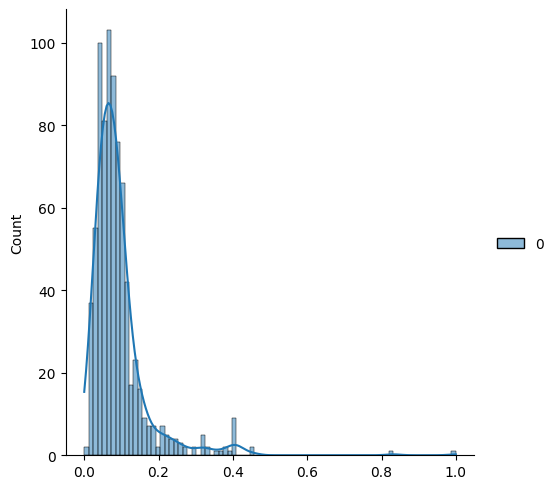

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tmp = scaler.fit_transform(arr)
sns.displot(tmp, kde=True)
plt.show()

## PowerTransformer 클래스
- 거듭제곱 변환을 적용하여 데이터를 정규분포와 유사하게 변환

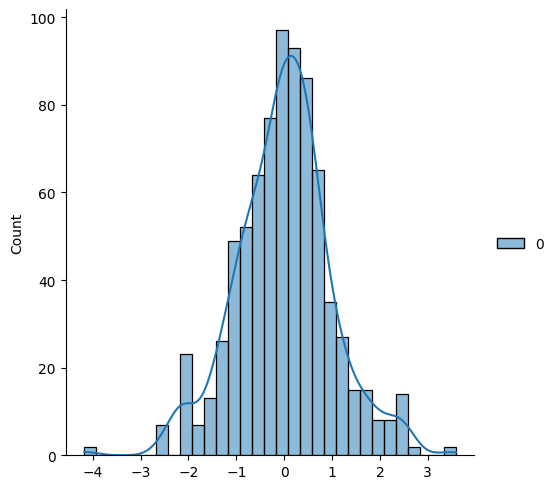

In [46]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
tmp = scaler.fit_transform(arr)

sns.displot(tmp, kde=True)
plt.show()

## RobustScaler 클래스
- 평균과 표준편차 대신에 중앙값과 사분위수 범위(IQR)를 이용하여 Scaling

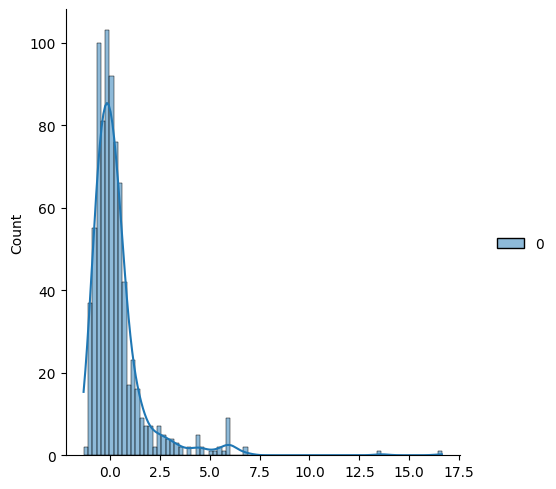

In [47]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
tmp = scaler.fit_transform(arr)
sns.displot(tmp, kde=True)
plt.show()

In [48]:
scaler.inverse_transform(tmp) # 복원하기

array([[ 110000.],
       [  68000.],
       [ 130000.],
       [ 146000.],
       [  76000.],
       [  63000.],
       [  61000.],
       [  63000.],
       [  67000.],
       [  94000.],
       [  75000.],
       [  69000.],
       [ 162000.],
       [ 132000.],
       [ 107000.],
       [ 102000.],
       [  67000.],
       [ 183000.],
       [ 121000.],
       [ 164000.],
       [  95000.],
       [  60000.],
       [ 296000.],
       [  95000.],
       [ 120000.],
       [ 201000.],
       [  67000.],
       [ 167000.],
       [ 124000.],
       [ 133000.],
       [ 119000.],
       [  65000.],
       [ 121000.],
       [  56000.],
       [ 182000.],
       [  89000.],
       [ 124000.],
       [  88000.],
       [  98000.],
       [  97000.],
       [  87000.],
       [  65000.],
       [  50000.],
       [  96000.],
       [ 183000.],
       [ 147000.],
       [  84000.],
       [ 128000.],
       [ 500000.],
       [  44000.],
       [  86000.],
       [ 106000.],
       [  76

- 스케일링 하기

In [49]:
scaler = RobustScaler()
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)

In [50]:
test_ft[test_ft.columns] = scaler.transform(test_ft)

# 특성 선택(Feature Selection)
- 전체 Features를 사용하지 않고 중요한 Feature들을 선택해서 학습




## SelectFromModel 클래스
- 모델의 Features 중요도 또는 가중치를 기반으로 Features를 선택하는 방법


- 모델의 Features 중요도 기반으로 특성 선택

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # 특성 선택을 하기 위한 모델
fs_model = RandomForestClassifier(random_state=42)

select = SelectFromModel(fs_model)
x = select.fit_transform(train_ft, target)
x.shape

(787, 19)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
cv = KFold( n_splits= 5, shuffle=True, random_state=42)
model = LogisticRegression(random_state=42)
scores = cross_val_score(model, x, target, cv = cv, n_jobs=-1, scoring="roc_auc")
scores.mean()

0.6587811476547621

- 모델의 가중치 기반으로 특성 선택

In [53]:
fs_model = LogisticRegression(random_state=42)
select = SelectFromModel(fs_model)
x = select.fit_transform(train_ft, target)
x.shape

c:\Users\hopio\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(787, 20)

In [54]:
!pip install lightgbm

In [55]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
scores = cross_val_score(model, x, target, cv = cv, n_jobs=-1, scoring="roc_auc")
scores.mean()

0.6145836417945104

- 선택된 피처 확인해보기

In [56]:
cols_best = select.get_feature_names_out()
cols_best

array(['수치2', '변제횟수', '연체횟수유형2_sum', '정상결제횟수_sum', '정상결제횟수_mean',
       '카드한도_mean', '범주1_4', '범주1_5', '범주1_7', '범주2_1', '범주2_3', '범주3_1',
       '범주3_2', '범주4_8', '범주4_11', '범주4_15', '범주5_5', '범주6_3', '범주6_4',
       '범주6_5'], dtype=object)

In [57]:
# test_ft[cols_best]

## SelectKBest, SelectPercentile 클래스
- 각 Feature와 Target 사이에 유의한 통계적 관계가 있는지 계산하여 Features를 선택하는 방법
- SelectKBest
    - k개의 가장 유의한 통계적 관계가 있는 피쳐를 선택
- SelectPercentile
    - 백분위수에 따라 가장 유의한 통계적 관계가 있는 피쳐를 선택

In [58]:
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [59]:
select = SelectKBest(k=10)
x = select.fit_transform(train_ft, target)

print(x)

model = LogisticRegression(random_state=42)
scores = cross_val_score(model, x, target, cv = cv, n_jobs=-1, scoring="roc_auc")
scores.mean()

[[ 0.12121212 -0.14285714 -0.52525253 ...  2.10379589  1.48064864
   1.        ]
 [-0.51515152 -0.28571429 -0.4040404  ... -0.33967888 -0.31183629
   0.        ]
 [ 0.42424242  0.          0.01010101 ... -0.18655933  0.26165811
   1.        ]
 ...
 [ 1.31818182 -0.42857143 -0.42424242 ... -0.12253571  0.15964048
   1.        ]
 [-0.10606061 -0.28571429 -0.36363636 ... -0.38106884 -0.28186315
   0.        ]
 [ 0.03030303 -0.42857143 -0.61616162 ... -0.54164572 -0.37986196
   1.        ]]


0.6640976123041868

In [60]:
select = SelectPercentile(percentile=20)
x = select.fit_transform(train_ft, target)

print(x)

model = LogisticRegression(random_state=42)
scores = cross_val_score(model, x, target, cv = cv, n_jobs=-1, scoring="roc_auc")
scores.mean()

[[ 0.12121212 -0.14285714 -0.52525253 ...  0.          1.
   0.        ]
 [-0.51515152 -0.28571429 -0.4040404  ...  1.          0.
   1.        ]
 [ 0.42424242  0.          0.01010101 ...  0.          1.
   0.        ]
 ...
 [ 1.31818182 -0.42857143 -0.42424242 ...  0.          1.
   0.        ]
 [-0.10606061 -0.28571429 -0.36363636 ...  1.          0.
   1.        ]
 [ 0.03030303 -0.42857143 -0.61616162 ...  1.          1.
   1.        ]]


0.665238781898819

# 테스트 데이터에 예측하기

In [61]:
cols_best = select.get_feature_names_out()
cols_best

array(['수치2', '변제횟수', '정상결제횟수_sum', '정상결제횟수_mean', '정상결제횟수_std',
       '카드현재잔액_mean', '카드현재잔액_std', '카드최고잔액_mean', '카드최고잔액_std', '범주1_4',
       '범주2_1', '범주4_8'], dtype=object)

- 학습데이터 전체 학습

In [62]:
model = LogisticRegression(random_state=42)
model.fit(train_ft[cols_best], target)

LogisticRegression(random_state=42)

- 테스트 데이터에 대하여 예측

In [63]:
pred = model.predict_proba(test_ft[cols_best])[:, 1]
pred

array([0.20772145, 0.16954551, 0.20496333, 0.27603003, 0.18595729,
       0.29710884, 0.08200921, 0.1449446 , 0.06278548, 0.21112076,
       0.27895828, 0.22956115, 0.20563693, 0.32138011, 0.25212233,
       0.1658482 , 0.15125313, 0.15549032, 0.17374106, 0.18996594,
       0.37225149, 0.32609626, 0.13779043, 0.23199858, 0.14690362,
       0.22006407, 0.20377976, 0.32589953, 0.1323422 , 0.25989385,
       0.30331539, 0.13476229, 0.31056524, 0.11098533, 0.10202613,
       0.19001076, 0.29477316, 0.22606947, 0.17633364, 0.24735111,
       0.23823982, 0.22995338, 0.25759094, 0.16618073, 0.24929047,
       0.16569333, 0.16840545, 0.0880483 , 0.04346062, 0.14982034,
       0.11833705, 0.3014199 , 0.21987835, 0.17145561, 0.29219627,
       0.19851882, 0.1192852 , 0.33096371, 0.06771941, 0.99929748,
       0.1686532 , 0.33095245, 0.34412787, 0.05733335, 0.24219844,
       0.08650875, 0.11382027, 0.29373572, 0.13374676, 0.16395351,
       0.13523708, 0.19486607, 0.19069963, 0.03126385, 0.16721